# Introduction

The project goal is to explore the relationship between actors' traits — such as age, gender, ethnicity — and the character archetypes they portray in films. By analyzing casting patterns, this project aims to find out how specific actor profiles consistently coincide with archetypal roles like heroes, villains, mentors, or lovers. Our goal is to uncover whether certain traits predispose actors to particular roles and identify any underlying biases in casting decisions. This research also explores how these patterns vary across different film industries and across time. Ultimately, we aim to tell the story of how an actor's characteristics shape their cinematic destiny, influencing not only their career trajectory but also how audiences perceive iconic characters on screen.

In [1]:
# ignore
%load_ext autoreload
%autoreload 2

In [2]:
# ignore
%config InlineBackend.figure_formats = ['svg']
%matplotlib inline

In [3]:
# ignore
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

import os
import sys
sys.path.append(os.path.join(os.getcwd(), "../visualization"))
from plot_3d_like import plot_2d_heatmap

In [4]:
# ignore
sys.path.insert(0, '../..')
from src.scripts.load_data import data

data.shape

(87210, 21)

### Dataset

In [5]:
# ignore

# it is easier and faster to make prints and then copy them to the markdown...
print("nationality", data["nationality"].nunique())
print("known nationality", data[["nationality", "fb_actor_id"]].dropna()["fb_actor_id"].nunique())

print("----")
print("gender", data["actor_gender"].nunique())
print("known gender", data[["gender", "fb_actor_id"]].dropna()["fb_actor_id"].nunique())

print("----")
print("education", data["education"].nunique())
print("known education", data[["education", "fb_actor_id"]].dropna()["fb_actor_id"].nunique())

print("----")
print("religion", data["religion"].nunique())
print("known religion", data[["religion", "fb_actor_id"]].dropna()["fb_actor_id"].nunique())

print("----")
print("race", data["race"].nunique())
print("known race", data[["race", "fb_actor_id"]].dropna()["fb_actor_id"].nunique())

print("----")
print("place_of_birth", data["place_of_birth"].nunique())
print("known place_of_birth", data[["place_of_birth", "fb_actor_id"]].dropna()["fb_actor_id"].nunique())

print("----")
print("professions_num", data["professions_num"].nunique())
print("known professions_num", data[["professions_num", "fb_actor_id"]].dropna()["fb_actor_id"].nunique())

print("----")
print("known actor_height", data[["actor_height", "fb_actor_id"]].dropna()["fb_actor_id"].nunique())

print("----")
print("professions_num", data["professions_num"].nunique())
print("known professions_num", data[["professions_num", "fb_actor_id"]].dropna()["fb_actor_id"].nunique())

print("----")
print("archetype", data["archetype"].nunique())
print("known archetype", data[["archetype", "fb_actor_id"]].dropna()["fb_actor_id"].nunique())

print("----")
print("known actor_date_of_birth", data[["actor_date_of_birth", "fb_actor_id"]].dropna()["fb_actor_id"].nunique())

print("----")
print("known actor_height", data[["actor_height", "fb_actor_id"]].dropna()["fb_actor_id"].nunique())

print("----")
print("known weight", data[["weight", "fb_actor_id"]].dropna()["fb_actor_id"].nunique())


nationality 165
known nationality 25876
----
gender 2
known gender 26304
----
education 2
known education 26491
----
religion 88
known religion 1682
----
race 12
known race 4163
----
place_of_birth 6908
known place_of_birth 25690
----
professions_num 20
known professions_num 26491
----
known actor_height 9127
----
professions_num 20
known professions_num 26491
----
archetype 12
known archetype 26721
----
known actor_date_of_birth 26721
----
known actor_height 9127
----
known weight 432


We present our dataset with films, actors, characters, and **archetypes**!

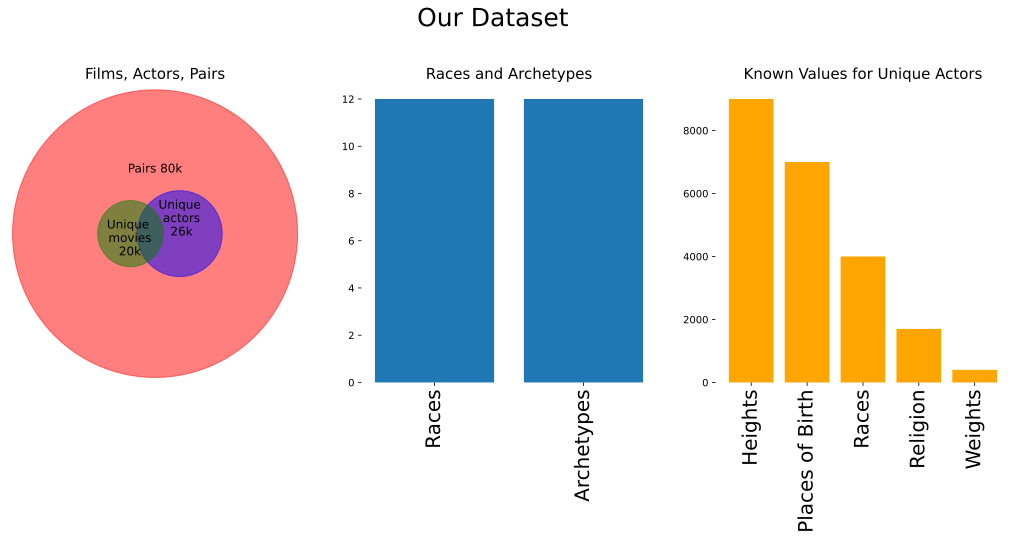

In [6]:
# hidecode

# in this cell I do a desing for the intro of our dataset

coeff = 30_000
circle1 = plt.Circle((0, 0), 87000/coeff , color='r', alpha=0.5)
circle2 = plt.Circle((0.5, 0.0), 26000/coeff, color='blue', alpha=0.5)
circle3 = plt.Circle((-0.5, 0.0), 20000/coeff, color='g', alpha=0.5)

fig, axes = plt.subplots(nrows=1, ncols=3) # note we must use plt.subplots, not plt.subplot
fig.subplots_adjust(top=0.8)
fig.set_figwidth(18)
fig.set_figheight(6)
fig.suptitle("Our Dataset", fontsize=25)

# add circles
axes[0].set_title("Films, Actors, Pairs", fontsize=15)
axes[0].add_patch(circle1)
axes[0].add_patch(circle2)
axes[0].add_patch(circle3)
axes[0].text(0.0, 1.3, "Pairs 80k", fontsize=12, ha='center', va='center')
axes[0].text(0.5, 0.3, "Unique\n actors\n 26k", fontsize=12, ha='center', va='center')
axes[0].text(-0.55, -0.1, "Unique\n movies\n 20k", fontsize=12, ha='center', va='center')
axes[0].set_xlim(-3, 3)
axes[0].set_ylim(-3, 3)
axes[0].axis('off')

# add small bar for races and archetypes
axes[1].set_title("Races and Archetypes", fontsize=15)
axes[1].set_xticks([0, 1])
axes[1].set_xticklabels(["Races", "Archetypes"], rotation=90, fontsize=20)
axes[1].bar(x=["Races", "Archetypes"], height=[12, 12])
for spine in axes[1].spines.values():
    spine.set_visible(False)  # Hide the frame

# add small bar for more-less important known values
axes[2].set_title("Known Values for Unique Actors", fontsize=15)
arr2 = ["Heights", "Places of Birth", "Races", "Religion", "Weights"]
axes[2].set_xticks(np.arange(len(arr2)))
axes[2].set_xticklabels(arr2, rotation=90, fontsize=20)
axes[2].bar(height=[9000, 7000, 4000, 1700, 400], x=arr2, color="orange")
for spine in axes[2].spines.values():
    spine.set_visible(False)  # Hide the frame

The dataset consists of:

- 87000+ pairs actor-film
- 165 nationalities known for ~26k unique actors
- 2 genders known for ~26k unique actors
- no/yes education for ~26k unique actors
- 88 religions known for ~1500 unique actors
- 12 races known for 4000 unique actors
- 7000 Places of Birth known for ~25k unique actors
- Professions number known for ~26k unique actors
- 12 Archetypes known for ~26k unique actors
- Dates of birth known for 26k unique actors
- Actor heights known for ~9k unique actors
- Actor weight known for ~400 unique actors

### Data collection
Our primary dataset is the CMU Movie Summary Corpus (CMUD), which contains actor features such as height, age, and Freebase ethnicity ID. However, these features provide limited information about the actors. Additional attributes like weight, race, hairstyle, and eye color are necessary for a more comprehensive analysis. To address this, we decided to enrich the dataset by parsing additional websites and utilizing other datasets.

1. Enriching:

The initial CMUD includes links to movie and actor IDs from Freebase, which is no longer maintained. Fortunately, a Freebase data dump from 2017 is available here, containing all the data Freebase had at that time.

We processed this file to extract information about actors, such as education, number of professions, nationality, weight, religion, and place of birth.

It is also important to include the race of an actor, as it significantly affects their appearance. The initial CMUD only provides Freebase ethnicity IDs, so we reprocessed the Freebase dump to extract ethnicity information. We categorized ethnicities into 12 racial groups (a controversial issue): European, African, Indian, Asian, Pacific Islander, Middle Eastern, Latino, Indigenous/Native American, Arab, Caucasus, Caribbean, and Mixed.

Additionally, we found that the CMUD lacks a substantial number of movie summaries, which are essential for identifying character archetypes. To address this, we parsed data from IMDB and Wikipedia.

2. Archetype analysis:

There is a [paper](https://www.cs.cmu.edu/~dbamman/pubs/pdf/bamman+oconnor+smith.acl13.pdf) which indentifies archetypes in movies using statistical methods. \
We also used some specific statistical methods, which are known as LLMs. It is well known that they can do few-shot tasks with high accuracy.
But to make a few-shot task we need to have a few examples. We decided to create a tiny dataset of 200 samples with movies summaries, characters names, characters archetypes. 

